<a href="https://colab.research.google.com/github/ehpub/ML-with-Python/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_with_python_004_%ED%9A%8C%EA%B7%80_%EB%AA%A8%EB%8D%B8_%ED%8F%89%EA%B0%80_%EB%8F%84%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[설명](https://ehpub.co.kr/%ed%9a%8c%ea%b7%80-%eb%aa%a8%eb%8d%b8-%ed%8f%89%ea%b0%80-%eb%8f%84%ea%b5%ac-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d-with-%ed%8c%8c%ec%9d%b4%ec%8d%ac/)

In [2]:
from sklearn.metrics import r2_score #r2 결정 계수(회귀)
from sklearn.metrics import mean_absolute_error #평균 절대 오차
from sklearn.metrics import mean_squared_error #평균 제곱 오차
from sklearn.metrics import mean_absolute_percentage_error #평균 절대 퍼센트 오차
from sklearn.model_selection import cross_val_score #교차 검증 점수

from sklearn.linear_model import LinearRegression #선형 회귀
from sklearn.svm import SVR #서포트 벡터 머신 회귀
from sklearn.neighbors import KNeighborsRegressor #K 최근접 이웃 회귀
from sklearn.tree import DecisionTreeRegressor #결정 트리 회귀
from sklearn.ensemble import RandomForestRegressor #랜덤 포리스트 회귀
from sklearn.datasets import load_diabetes #당뇨병 환자 데이터 로드
from sklearn.model_selection import train_test_split #학습 및 테스트 데이터 분리
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 회귀 모델 평가 도구

- R2 결정 계수

sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)

[r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

- MAE

sklearn.metrics.mean_absolute_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')

[mean_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)

- MSE

sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)

[mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

- MAPE

sklearn.metrics.mean_absolute_percentage_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')

[mean_absolute_percentage_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html#sklearn.metrics.mean_absolute_percentage_error)

In [3]:
predict = np.array([172, 188, 177, 165, 171])
actual = np.array([170, 183, 176, 162,174])

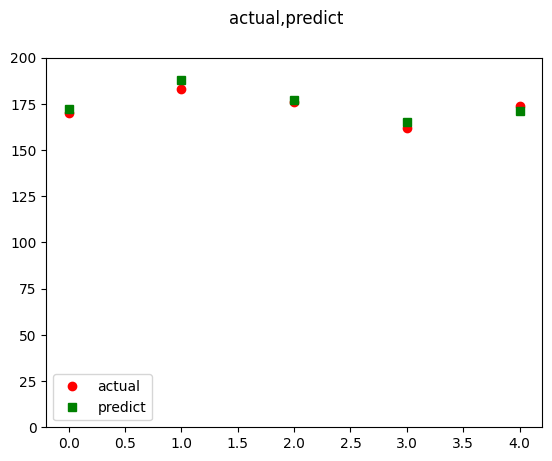

In [21]:
plt.plot(actual, 'ro',label='actual')
plt.plot(predict,'gs',label='predict')
plt.ylim(0,200)
plt.legend()
plt.suptitle('actual,predict')
plt.show()

### MAE

평균 절대 오차로 실제 값과 예측 값의 차이의 부호를 없애기 위해 절대값을 취합니다.

그러한 오차의 절대값의 평균을 내는 것이 MAE(mean absolute error) 입니다.

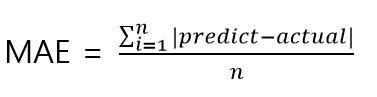


sklearn.metrics.mean_absolute_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')

[mean_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)

In [4]:
def mean_absolute_error_m(actual,predict):
  return (np.abs(predict-actual)).mean()

In [5]:
print(f'mae:{mean_absolute_error_m(actual, predict):.3f}')
print(f'mae:{mean_absolute_error(actual, predict):.3f}')

mae:2.800
mae:2.800


### MSE

오차(실제 값과 예측 값의 차이)를 제곱을 취한 후 평균을 낸 값입니다.

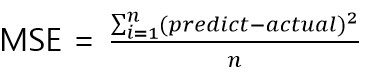

sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)

[mean_squared_error]https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

In [ ]:
def mean_squared_error_m(actual,predict):
  return ((predict-actual)**2).mean()

In [ ]:
print(f'mse:{mean_squared_error_m(actual, predict):.3f}')
print(f'mse:{mean_squared_error(actual, predict):.3f}')

mse:9.600
mse:9.600


### MAPE


오차(실제값과 예측값)의 절대값을 실제값으로 나눈 비율의 평균입니다.

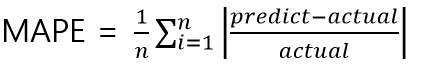

sklearn.metrics.mean_absolute_percentage_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')

[mean_absolute_percentage_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html#sklearn.metrics.mean_absolute_percentage_error)

In [ ]:
def mean_absolute_percentage_error_m(actual,predict):
  return np.abs(((predict-actual)/actual)).mean()

In [ ]:
print(f'mape:{mean_absolute_percentage_error_m(actual, predict):.3f}')
print(f'mape:{mean_absolute_percentage_error(actual, predict):.3f}')

mape:0.016
mape:0.016


### R2 결정 계수



sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)

r2_score

In [24]:
def sst(actual):
  am = actual.mean()
  return ((actual-am)**2).sum()

In [25]:
print(f"sst:{sst(actual)}")

sst:240.0


In [26]:
def ssr(actual, predict):
  return ((actual-predict)**2).sum()

In [27]:
print(f"ssr:{ssr(actual, predict)}")

ssr:48


In [28]:
def sse(actual,predict):
  return((predict-actual.mean())**2).sum()

In [35]:
print(f"sse:{sse(actual, predict)}")

sse:310.0


In [36]:
def r2_score_m(actual, predict):
  return sse(actual, predict)/sst(actual)

In [37]:
def r2_score_m2(actual, predict):
  return 1 - ssr(actual, predict)/sst(actual)

In [38]:
print(f'r2:{r2_score_m(actual, predict):.3f}')
print(f'r2:{r2_score_m2(actual, predict):.3f}')
print(f'r2:{r2_score(actual, predict):.3f}')

r2:1.292
r2:0.800
r2:0.800


## 회귀 모델 학습 및 평가

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/ehpub/ML-with-Python/main/industrial.csv')
display(df.head(3))

,시군,단지명,전체면적,입주업체,가동업체,생산,인원수
0,19,341,123,196,196,30000,1521
1,3,227,729,200,131,0,38873
2,1,63,27,0,0,0,0


In [ ]:
data = df.drop('생산',axis=1)
target = df['생산']

In [ ]:
x_train,x_test, y_train,y_test = train_test_split(data,target)

In [ ]:
models = []
models.append(LinearRegression()) #선형 회귀 모델
models.append(SVR())  #서포트 벡터 머신
models.append(KNeighborsRegressor()) #K 최근접 이웃
models.append(DecisionTreeRegressor()) #결정 트리
models.append(RandomForestRegressor()) #랜덤 포레스트
for model in models:
  print(model.__class__.__name__,"###")
  eval_scores = cross_val_score(model,x_train, y_train)
  print(f"교차 검증 평가 점수 평균:{eval_scores.mean():.3f}")

LinearRegression ###
교차 검증 평가 점수 평균:0.319
SVR ###
교차 검증 평가 점수 평균:-0.115
KNeighborsRegressor ###
교차 검증 평가 점수 평균:0.072
DecisionTreeRegressor ###
교차 검증 평가 점수 평균:0.211
RandomForestRegressor ###
교차 검증 평가 점수 평균:0.338


In [ ]:
model = models[4]
print(model.__class__.__name__,"###")
model.fit(x_train,y_train)
predict = model.predict(x_test)
print(f"r2 결정 계수:{r2_score(y_test,predict):.3f}")

RandomForestRegressor ###
r2 결정 계수:0.181


In [ ]:
mms = MinMaxScaler()
mms.fit(x_train)
x_train2 =  mms.transform(x_train)
x_test2 =  mms.transform(x_test)

In [ ]:
models = []
models.append(LinearRegression())
models.append(SVR())
models.append(KNeighborsRegressor())
models.append(DecisionTreeRegressor())
models.append(RandomForestRegressor())
for model in models:
  print(model.__class__.__name__,"###")
  eval_scores = cross_val_score(model,x_train2, y_train)
  print(f"교차 검증 평가 점수 평균:{eval_scores.mean():.3f}")

LinearRegression ###
교차 검증 평가 점수 평균:0.319
SVR ###
교차 검증 평가 점수 평균:-0.115
KNeighborsRegressor ###
교차 검증 평가 점수 평균:0.017
DecisionTreeRegressor ###
교차 검증 평가 점수 평균:-0.628
RandomForestRegressor ###
교차 검증 평가 점수 평균:0.323


In [ ]:
model = models[4]
print(model.__class__.__name__,"###")
model.fit(x_train2,y_train)
predict = model.predict(x_test2)
print(f"r2 결정 계수:{r2_score(y_test,predict):.3f}")

RandomForestRegressor ###
r2 결정 계수:0.112
